In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have no NA values which is good

Class as pie chart:


Text(0,0.5,'')

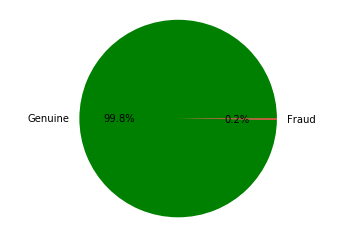

In [4]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','r'])
plt.axis('equal')
plt.ylabel('')

Our dataset is very unbalanced. We have to do something about it

# Undersampling

Our goal here is to delete instances from the over-represented class

In [5]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
y = df['Class']
X = df.drop(['Class'], axis=1)
print(X.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10     ...           V20       V21       V22  \
0  0.098698  0.363787  0.090794     ...      0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974     ...     -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643     ...      0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952     ...     -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074     ...      0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  normAmount  
0 -0.11047

In [7]:
# Number of data points in the minority class
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df[df.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df.iloc[under_sample_indices,:]

y_undersample = under_sample_data['Class']
X_undersample = under_sample_data.drop(['Class'], axis=1)

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


Now we have as much frauds than genuines

In [8]:
# Let's do a train_test_split on these data

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0
)

Now we will try some algorithms with GridSearch

### Logistic Regression

First let's build our model around the undersampled data

In [9]:
lr_param_C = [0.01,0.1,1,10,100]
lr_param_grid = {'C': lr_param_C, 'penalty': ['l1']}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid)
lr_grid_search.fit(X_train_under, y_train_under)

print('Logistic Regression')
print('The best score with GridSearch for Logistic Regression is :', lr_grid_search.best_score_)
print('The best parameters with GridSearch for Logistic Regression are :', lr_grid_search.best_params_)

lr_best_params = lr_grid_search.best_params_

lr = LogisticRegression(C=lr_best_params['C'], penalty='l1')
lr.fit(X_train_under, y_train_under)
lr_train_score = lr.score(X_train_under, y_train_under)
lr_test_score = lr.score(X_test_under, y_test_under)
print  ('Logistic Regression train score =', lr_train_score)
print  ('Logistic Regression test score = ', lr_test_score)

Logistic Regression
The best score with GridSearch for Logistic Regression is : 0.943313953488
The best parameters with GridSearch for Logistic Regression are : {'C': 1, 'penalty': 'l1'}
Logistic Regression train score = 0.954941860465
Logistic Regression test score =  0.942567567568


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.918367346939


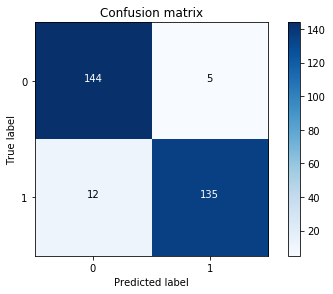

In [11]:
y_pred_undersample_lr = lr.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under,y_pred_undersample_lr)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.924796747967


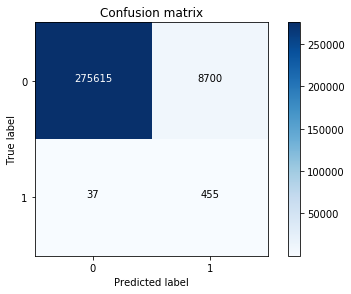

In [12]:
y_pred = lr.predict(X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### SVM

SVC :
The best score with GridSearch for SVC is : 0.911337209302
The best parameters with GridSearch for SVC are : {'C': 1}
SVC train score = 0.966569767442
SVC test score =  0.932432432432
Recall metric in the testing dataset:  0.918367346939


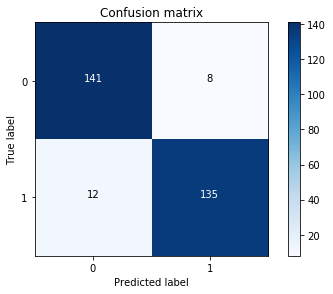

In [13]:
svc_param_C = [0.01,0.1,1,10,100]
svc_param_grid = {'C': svc_param_C}

svc_grid_search = GridSearchCV(SVC(), svc_param_grid)
svc_grid_search.fit(X_train_under, y_train_under)

print('SVC :')
print('The best score with GridSearch for SVC is :', svc_grid_search.best_score_)
print('The best parameters with GridSearch for SVC are :', svc_grid_search.best_params_)

svc_best_params = svc_grid_search.best_params_

svc = SVC(C=svc_best_params['C'])
svc.fit(X_train_under, y_train_under)
svc_train_score = svc.score(X_train_under, y_train_under)
svc_test_score = svc.score(X_test_under, y_test_under)
print  ('SVC train score =', svc_train_score)
print  ('SVC test score = ', svc_test_score)

y_pred_undersample_svc = svc.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_svc)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.932926829268


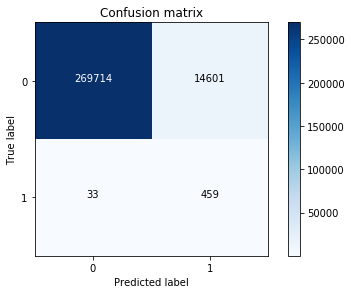

In [14]:
y_pred_svc = svc.predict(X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y,y_pred_svc)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Random Forest

rf :
The best score with GridSearch for rf is : 0.9375
The best parameters with GridSearch for rf are : {'n_estimators': 100}
rf train score = 1.0
rf test score =  0.949324324324
Recall metric in the testing dataset:  0.918367346939


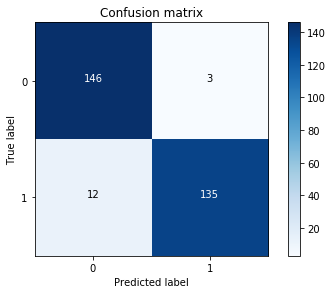

In [15]:
rf_param_n_estimator = [1,10,100]
rf_param_grid = {'n_estimators': rf_param_n_estimator}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid)
rf_grid_search.fit(X_train_under, y_train_under)

print('rf :')
print('The best score with GridSearch for rf is :', rf_grid_search.best_score_)
print('The best parameters with GridSearch for rf are :', rf_grid_search.best_params_)

rf_best_params = rf_grid_search.best_params_

rf = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'])
rf.fit(X_train_under, y_train_under)
rf_train_score = rf.score(X_train_under, y_train_under)
rf_test_score = rf.score(X_test_under, y_test_under)
print  ('rf train score =', rf_train_score)
print  ('rf test score = ', rf_test_score)

y_pred_undersample_rf = rf.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_rf)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.975609756098


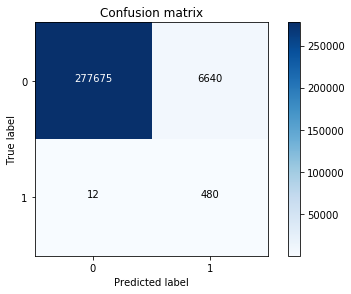

In [16]:
y_pred_rf = rf.predict(X)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y,y_pred_rf)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Neural Networks

In [17]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

Using TensorFlow backend.
/home/damien/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [18]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    
    return recall

def getModel():
    model = Sequential()
    
    model.add(Dense(16, input_dim=29))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(18))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(24))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', recall])
    
    
    return model

def get_callbacks(filepath, patience=10):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]
file_path = ".model_weights.hdf5"
callbacks = get_callbacks(filepath=file_path, patience=100)

In [19]:
X_train_under_array = X_train_under.as_matrix()
y_train_under_array = y_train_under.as_matrix()
X_test_under_array = X_test_under.as_matrix()
y_test_under_array = y_test_under.as_matrix()

In [20]:
import os
model=getModel()
model.fit(X_train_under_array, y_train_under_array,
          batch_size=24,
          epochs=1000,
          verbose=1,
          validation_data=(X_test_under_array, y_test_under_array),
          callbacks=callbacks)

Train on 688 samples, validate on 296 samples
Epoch 1/1000
688/688 [==============================] - 0s 509us/step - loss: 0.7115 - acc: 0.5494 - recall: 0.8070 - val_loss: 0.5115 - val_acc: 0.6486 - val_recall: 0.9701
Epoch 2/1000
688/688 [==============================] - 0s 106us/step - loss: 0.5960 - acc: 0.6279 - recall: 0.8226 - val_loss: 0.4788 - val_acc: 0.7669 - val_recall: 0.9364
Epoch 3/1000
688/688 [==============================] - 0s 104us/step - loss: 0.5714 - acc: 0.6613 - recall: 0.8266 - val_loss: 0.4446 - val_acc: 0.8378 - val_recall: 0.9364
Epoch 4/1000
688/688 [==============================] - 0s 96us/step - loss: 0.5124 - acc: 0.7427 - recall: 0.8486 - val_loss: 0.4132 - val_acc: 0.8953 - val_recall: 0.9174
Epoch 5/1000
688/688 [==============================] - 0s 102us/step - loss: 0.4797 - acc: 0.8067 - recall: 0.8796 - val_loss: 0.3843 - val_acc: 0.9189 - val_recall: 0.9178
Epoch 6/1000
688/688 [==============================] - 0s 92us/step - loss: 0.4441 -

Epoch 48/1000
688/688 [==============================] - 0s 77us/step - loss: 0.1598 - acc: 0.9331 - recall: 0.9006 - val_loss: 0.1539 - val_acc: 0.9426 - val_recall: 0.9188
Epoch 49/1000
688/688 [==============================] - 0s 78us/step - loss: 0.1775 - acc: 0.9346 - recall: 0.9031 - val_loss: 0.1559 - val_acc: 0.9426 - val_recall: 0.9130
Epoch 50/1000
688/688 [==============================] - 0s 94us/step - loss: 0.1591 - acc: 0.9448 - recall: 0.9136 - val_loss: 0.1529 - val_acc: 0.9426 - val_recall: 0.9188
Epoch 51/1000
688/688 [==============================] - 0s 86us/step - loss: 0.1542 - acc: 0.9360 - recall: 0.9128 - val_loss: 0.1527 - val_acc: 0.9426 - val_recall: 0.9188
Epoch 52/1000
688/688 [==============================] - 0s 128us/step - loss: 0.1388 - acc: 0.9477 - recall: 0.9251 - val_loss: 0.1506 - val_acc: 0.9459 - val_recall: 0.9188
Epoch 53/1000
688/688 [==============================] - 0s 75us/step - loss: 0.1555 - acc: 0.9390 - recall: 0.9076 - val_loss: 0

688/688 [==============================] - 0s 69us/step - loss: 0.1037 - acc: 0.9622 - recall: 0.9465 - val_loss: 0.1670 - val_acc: 0.9459 - val_recall: 0.9278
Epoch 96/1000
688/688 [==============================] - 0s 71us/step - loss: 0.0907 - acc: 0.9695 - recall: 0.9617 - val_loss: 0.1685 - val_acc: 0.9459 - val_recall: 0.9278
Epoch 97/1000
688/688 [==============================] - 0s 71us/step - loss: 0.1081 - acc: 0.9535 - recall: 0.9446 - val_loss: 0.1687 - val_acc: 0.9426 - val_recall: 0.9390
Epoch 98/1000
688/688 [==============================] - 0s 63us/step - loss: 0.1062 - acc: 0.9666 - recall: 0.9618 - val_loss: 0.1683 - val_acc: 0.9459 - val_recall: 0.9278
Epoch 99/1000
688/688 [==============================] - 0s 71us/step - loss: 0.1130 - acc: 0.9564 - recall: 0.9435 - val_loss: 0.1726 - val_acc: 0.9392 - val_recall: 0.9220
Epoch 100/1000
688/688 [==============================] - 0s 72us/step - loss: 0.1084 - acc: 0.9651 - recall: 0.9507 - val_loss: 0.1819 - val_ac

Epoch 142/1000
688/688 [==============================] - 0s 84us/step - loss: 0.0642 - acc: 0.9695 - recall: 0.9624 - val_loss: 0.2501 - val_acc: 0.9426 - val_recall: 0.9278
Epoch 143/1000
688/688 [==============================] - 0s 84us/step - loss: 0.0611 - acc: 0.9738 - recall: 0.9722 - val_loss: 0.2601 - val_acc: 0.9426 - val_recall: 0.9278
Epoch 144/1000
688/688 [==============================] - 0s 77us/step - loss: 0.0574 - acc: 0.9797 - recall: 0.9720 - val_loss: 0.2682 - val_acc: 0.9426 - val_recall: 0.9278
Epoch 145/1000
688/688 [==============================] - 0s 81us/step - loss: 0.0689 - acc: 0.9738 - recall: 0.9683 - val_loss: 0.2737 - val_acc: 0.9426 - val_recall: 0.9278
Epoch 146/1000
688/688 [==============================] - 0s 78us/step - loss: 0.0631 - acc: 0.9767 - recall: 0.9744 - val_loss: 0.2836 - val_acc: 0.9426 - val_recall: 0.9278
Epoch 147/1000
688/688 [==============================] - 0s 77us/step - loss: 0.0669 - acc: 0.9724 - recall: 0.9677 - val_lo

In [21]:
score = model.evaluate(X.as_matrix(), y.as_matrix(), batch_size=24)
print('Original dataset loss:', score[0])
print('Original dataset accuracy:', score[1])

284807/284807 [==============================] - 7s 25us/step
Original dataset loss: 0.140150667149
Original dataset accuracy: 0.953786244653


In [24]:
y_pred_dl = model.predict(X.as_matrix(), batch_size=24, verbose=1)

284807/284807 [==============================] - 4s 13us/step
[[ 0.01]
 [ 0.  ]
 [ 0.  ]
 ..., 
 [ 0.  ]
 [ 0.03]
 [ 0.  ]]


In [33]:
confuction_matrix_dl = confusion_matrix(y.as_matrix(), np.round(y_pred_dl))
print(confuction_matrix_dl)
print('Recall :', confuction_matrix_dl[1,1]/(confuction_matrix_dl[1,0]+confuction_matrix_dl[1,1]))

[[271171  13144]
 [    18    474]]
Recall : 0.963414634146
